<a href="https://colab.research.google.com/github/tanuku-srivalli/Breast-Cancer/blob/main/AIML_TASK_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_curve,
    roc_auc_score,
    ConfusionMatrixDisplay
)

In [16]:
#1 Loading Breast Cancer Wisconsin Dataset
data = load_breast_cancer(as_frame=True)
X = data.data  # Features (30 attributes)
y = data.target # Target (0: Malignant, 1: Benign)

print("Dataset loaded successfully.")
print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}\n")

Dataset loaded successfully.
Features (X) shape: (569, 30)
Target (y) shape: (569,)



In [17]:
#2 Train/test split and standardize features
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler only on the training data and transform both sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data split and features standardized.")

Data split and features standardized.


In [18]:
#3 Fit a Logistic Regression model
model = LogisticRegression(solver='liblinear', random_state=42)
# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] # Get probabilities for the positive class (1)

print("\nLogistic Regression Model fitted and predictions made.")


Logistic Regression Model fitted and predictions made.



--- Model Evaluation ---
Classification Report:
              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        42
      benign       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Confusion Matrix:


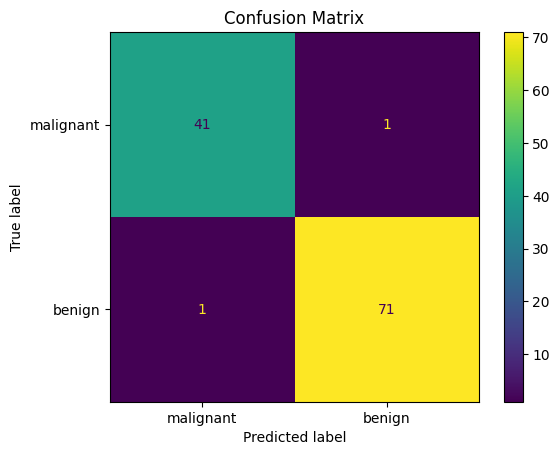


ROC-AUC Score: 0.9957


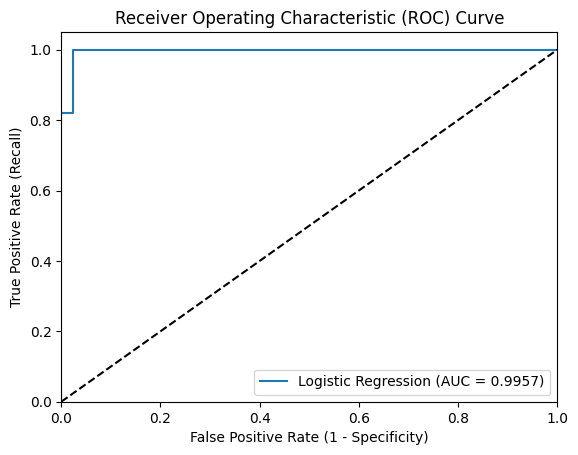

In [19]:
#4 Evaluate with confusion matrix, precision, recall, ROC-AUC
# a) Confusion Matrix and Classification Report
print("\n--- Model Evaluation ---")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
print("Confusion Matrix:")
# print(cm)

# Plot Confusion Matrix
disp.plot()
plt.title('Confusion Matrix')
plt.show()

# b) ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"\nROC-AUC Score: {roc_auc:.4f}")

# c) Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal line for the 'No Skill' model
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [20]:
#5 Tune threshold and explain sigmoid function
# Geometric Mean = sqrt(Recall * Specificity) where Specificity = 1 - FPR
gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)
optimal_threshold = thresholds[ix]

print(f"\n--- Threshold Tuning ---")
print(f"Optimal Threshold (Max G-Mean): {optimal_threshold:.4f}")


--- Threshold Tuning ---
Optimal Threshold (Max G-Mean): 0.3566


In [21]:
# Re-evaluate with the tuned threshold
y_pred_tuned = (y_pred_proba >= optimal_threshold).astype(int)
print("\nClassification Report with Tuned Threshold:")
print(classification_report(y_test, y_pred_tuned, target_names=data.target_names))

print("\n--- Explanation of the Sigmoid Function ---")
print("The Logistic Regression model uses the **Sigmoid function** (or Logistic function) to convert the raw, linear output (called the 'logit' or $z$) into a probability ($P$).")
print("The formula is: $P = \\frac{1}{1 + e^{-z}}$")
print("1. **Raw Output ($z$)**: This can be any real number (from $-\infty$ to $+\infty$).")
print("2. **Sigmoid Transformation**: This function squeezes $z$ into a value between 0 and 1, which can be interpreted as a probability.")
print("3. **Classification**: The model predicts the positive class (1) if the calculated probability $P$ is above a certain **threshold** (default is 0.5, but we tuned it to $%.4f$). If $P$ is below the threshold, it predicts the negative class (0)." % optimal_threshold)


Classification Report with Tuned Threshold:
              precision    recall  f1-score   support

   malignant       1.00      0.98      0.99        42
      benign       0.99      1.00      0.99        72

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114


--- Explanation of the Sigmoid Function ---
The Logistic Regression model uses the **Sigmoid function** (or Logistic function) to convert the raw, linear output (called the 'logit' or $z$) into a probability ($P$).
The formula is: $P = \frac{1}{1 + e^{-z}}$
1. **Raw Output ($z$)**: This can be any real number (from $-\infty$ to $+\infty$).
2. **Sigmoid Transformation**: This function squeezes $z$ into a value between 0 and 1, which can be interpreted as a probability.
3. **Classification**: The model predicts the positive class (1) if the calculated probability $P$ is above a certain **threshold** (default is 0.5, but w

<>:9: SyntaxWarning: invalid escape sequence '\i'
<>:9: SyntaxWarning: invalid escape sequence '\i'
/tmp/ipython-input-619287807.py:9: SyntaxWarning: invalid escape sequence '\i'
  print("1. **Raw Output ($z$)**: This can be any real number (from $-\infty$ to $+\infty$).")


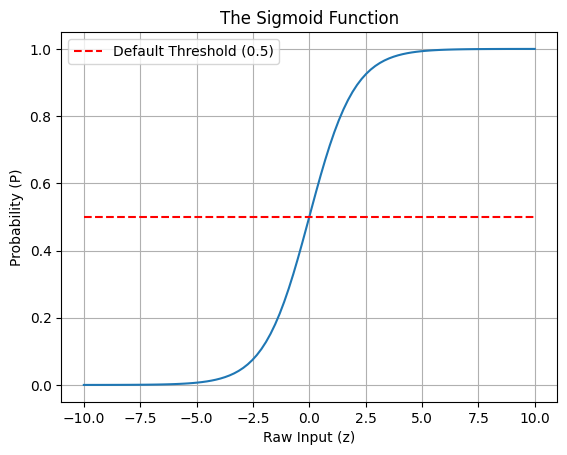

In [22]:
# Plot the Sigmoid function
z = np.linspace(-10, 10, 100)
P = 1 / (1 + np.exp(-z))
plt.figure()
plt.plot(z, P)
plt.plot([-10, 10], [0.5, 0.5], 'r--', label='Default Threshold (0.5)')
plt.title('The Sigmoid Function')
plt.xlabel('Raw Input (z)')
plt.ylabel('Probability (P)')
plt.legend()
plt.grid(True)
plt.show()